In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io
from sklearn.metrics import silhouette_score

# Load image
x = np.genfromtxt('data.csv', delimiter=',')
f, h = x.shape
print(x.shape)

# Convert image to a 2D array of pixels

# Perform K-means clustering with k=5 clusters
def squared_euclidean(u, v):
    return np.sum((u - v) ** 2)
K = 4
kmeans = KMeans(n_clusters=K)
kmeans.fit(x)
centroids = kmeans.cluster_centers_

# Assign each pixel to its nearest cluster center
labels = kmeans.predict(x)
global_silhouette_score = silhouette_score(x, labels, metric=squared_euclidean)
print(global_silhouette_score)

(4150, 3)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.7596139348888393


<Figure size 5000x5000 with 0 Axes>

GSS = 0.5270101525021651


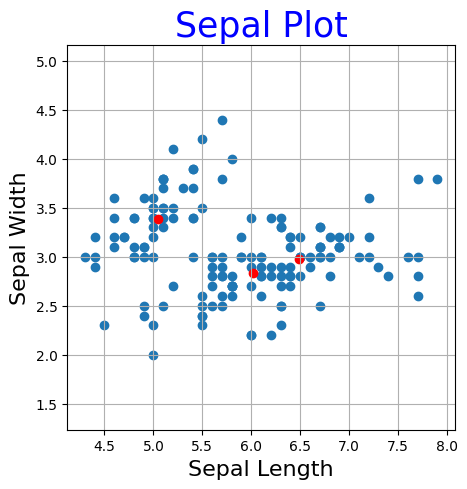

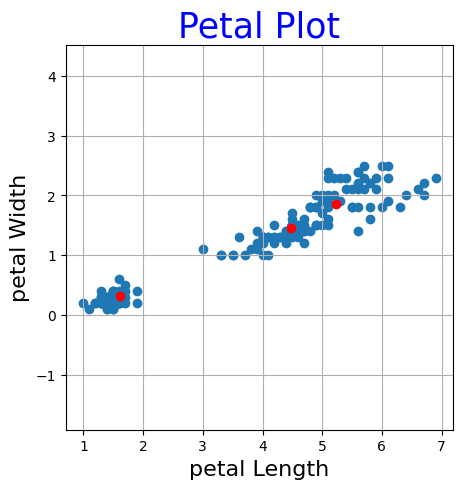

In [ ]:
#Fuzzy K Means
import pandas as pd # reading all required header files
import numpy as np
import random
import operator
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.datasets import load_iris


iris = load_iris()
df = pd.DataFrame(iris.data)
data = np.array(df)
n = len(df)  #number of data
k = 3  #number of clusters
d = 4  #dimension of cluster
m = 2  #m parameter
MAX_ITERS = 20  #number of iterations

def init():
  weight = np.random.dirichlet(np.ones(k),n)
  weight_arr = np.array(weight)
  return weight_arr


def compute_centroids(weight):
  C = []
  for i in range(k):
    _sum = np.power(weight[:,i],m).sum()
    C_j = []
    for x in range(d):
      num = ( df.iloc[:,x].values * np.power(weight[:,i],m)).sum()
      c_val = num/_sum;
      C_j.append(c_val)
    C.append(C_j)
  return C


def update_weights(weight,C):
  den = np.zeros(n)
  for i in range(k):
    dist = (df.iloc[:,:].values - C[i])**2
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)
    den  = den + np.power(1/dist,1/(m-1))

  for i in range(k):
    dist = (df.iloc[:,:].values - C[i])**2
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)
    weight[:,i] = np.divide(np.power(1/dist,1/(m-1)),den)
  return weight



def Fuzzy_Means_Clustering():
  weight = init()
  plt.figure(figsize=(50,50))
  for z in range(MAX_ITERS):
    C = compute_centroids(weight)
    update_weights(weight,C)
  plt.show()
  return (weight,C)



final_weights, Centers = Fuzzy_Means_Clustering()

from sklearn import metrics

u = final_weights.shape[0]
clusters = []
for i in range(u):
  clusters.append(np.argmax(final_weights[i]))
GSS = metrics.silhouette_score(data, clusters, metric='euclidean')
print(f"GSS = {GSS}")


def plot_result():
  df_sepal = df.iloc[:,0:2]
  df_petal = df.iloc[:,2:5]

  plt.figure(0,figsize=(5,5))                #scatter plot of sepal length vs sepal width
  plt.scatter(list(df_sepal.iloc[:,0]), list(df_sepal.iloc[:,1]), marker='o')
  plt.axis('equal')
  plt.xlabel('Sepal Length', fontsize=16)
  plt.ylabel('Sepal Width', fontsize=16)
  plt.title('Sepal Plot', fontsize=25,color='b')
  plt.grid()
  for center in Centers:
    plt.scatter(center[0],center[1], marker='o',color='r')
  plt.show()

  plt.figure(1,figsize=(5,5))                #scatter plot of sepal length vs sepal width
  plt.scatter(list(df_petal.iloc[:,0]), list(df_petal.iloc[:,1]), marker='o')
  plt.axis('equal')
  plt.xlabel('petal Length', fontsize=16)
  plt.ylabel('petal Width', fontsize=16)
  plt.title('Petal Plot', fontsize=25,color='b')
  plt.grid()
  for center in Centers:
    plt.scatter(center[2],center[3], marker='o',color='r')
  plt.show()

plot_result()


In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
X, y = datasets.load_iris(return_X_y=True)
import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_
print(f"GSI value = {metrics.silhouette_score(X, labels, metric='euclidean')}")

GSI value = 0.5528190123564095


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# DUNN INDEX
def compute_intra_cluster_diameters(X, labels):
    n_clusters = len(set(labels))
    cluster_diameters = np.zeros(n_clusters)
    for i in range(n_clusters):
        cluster_points = X[labels == i]
        if len(cluster_points) > 1:
            cluster_distances = np.linalg.norm(cluster_points[:, np.newaxis, :] - cluster_points[np.newaxis, :, :], axis=-1)
            cluster_diameters[i] = np.max(cluster_distances)
    return cluster_diameters

def compute_inter_cluster_distances(X, labels):
    n_clusters = len(set(labels))
    intercluster_distances = np.zeros((n_clusters, n_clusters))
    for i in range(n_clusters):
        for j in range(i+1, n_clusters):
            points_i = X[labels == i]
            points_j = X[labels == j]
            centroid_i = np.mean(points_i, axis=0)
            centroid_j = np.mean(points_j, axis=0)
            intercluster_distances[i, j] = np.linalg.norm(centroid_i - centroid_j)
            intercluster_distances[j, i] = intercluster_distances[i, j]
    return intercluster_distances

def dunn_index(X, labels):
    intra_cluster_diameters = compute_intra_cluster_diameters(X, labels)
    max_intradist = np.max(intra_cluster_diameters)

    inter_cluster_distances = compute_inter_cluster_distances(X, labels)
    non_zero_interdist = inter_cluster_distances[inter_cluster_distances > 0]
    min_interdist = np.min(non_zero_interdist) if non_zero_interdist.size > 0 else np.inf

    return min_interdist / max_intradist


print(f"Dunn Index for Iris Dataset = {dunn_index(X, labels)}")

Dunn Index for Iris Dataset = 0.6711698417833859


K Means and Metrics such as GSI and Dunn Index

In [ ]:
from PIL import Image
import numpy as np
img = Image.open(r"/content/test.jpeg")
img = np.array(img)
print(img.shape)
x = np.reshape(img, (img.shape[0]*img.shape[1], 3))

(30, 30, 3)


In [ ]:
for K in range(2, 5):
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(x)
    centroids = kmeans.cluster_centers_
    labels = kmeans.predict(x)
    global_silhouette_score = silhouette_score(x, labels, metric=squared_euclidean)
    print(f"GSS = {global_silhouette_score}  and Dunn = {dunn_index(x, labels)} for K = {K}")



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


GSS = 0.7574929790705345  and Dunn = 0.34857079938696456 for K = 2


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


GSS = 0.7554912649281197  and Dunn = 0.2432378858184389 for K = 3


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


GSS = 0.6798562424352856  and Dunn = 0.17915430468904925 for K = 4


In [ ]:
Img = Image.open(r"/content/test.jpeg")
Img.show()